Use the hyperlinks below to quickly navigate to the relevant problems
* [Integrals on infinite domains](#prob3)
* [A specialized quadrature rule](#prob4)
* [Trapezium rule vs FFT](#prob5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
import scipy.special

Integrals on infinite domains <a id='prob3'></a>

We wish to perform the following integrals on a semiinfinite domain using the mapping

(a) $\displaystyle \int_{0}^\infty \mathrm{e}^{-x^2} \,\mathrm{d} x = \dfrac{1}{2}\sqrt{\pi}$

(b) $\displaystyle \int_{0}^\infty \frac{1}{(x^2+1)^{3/2}}\,\mathrm{d} x = 1$

(c) $\displaystyle \int_0^\infty \frac{1}{(x+1)^{3/2}}\,\mathrm{d} x = 2$

using the algebraic mapping
$$
x = L\frac{1+t}{1-t}
$$
so that
$$
\int_0^\infty f(x)\,\mathrm{d} x =2L \int_{-1}^1 f\left( L\frac{1+t}{1-t} \right)\frac{\mathrm{d} t}{(1-t)^2}
$$
First, we complete the function below, whcih allows us to compute the integral of `f` using `n` points and with parameter `L`

In [3]:
"""
Integration of functions in the domain [0,+oo)
    f : a function handle
    n : number of points
    L = 1: mapping parameter
"""
def integralinf(f,n,L=1):
    x,w = np.polynomial.legendre.leggauss(n)
    w = 2*w*L/(1-x)**2
    x = L*(1+x)/(1-x)
    return np.sum(w*f(x))

Next, we define the 3 integrands and the exact values of the 3 integrals

In [4]:
Fa = lambda x: np.exp(-x*x)
Fb = lambda x: 1/(1+x*x)**1.5
Fc = lambda x: 1/(1+x)**1.5

Ea = 0.5*np.sqrt(np.pi)
Eb = 1 
Ec = 2

F = [Fa,Fb,Fc]
E = [Ea,Eb,Ec]
Fs = ['e^{-x^2}','(1+x^2)^{-3/2}','(1+x)^{-3/2}']

Finally, for each of the 3 integrals, we prepare 3 graphs containing the two convergence plots of the absolute error, namely by

(a) Fixing $L = 1,5,10,20$ and varying $1\le n\le100$;

(b) Fixing $n = 20,40,60,80$ and varying $1\le L\le20$

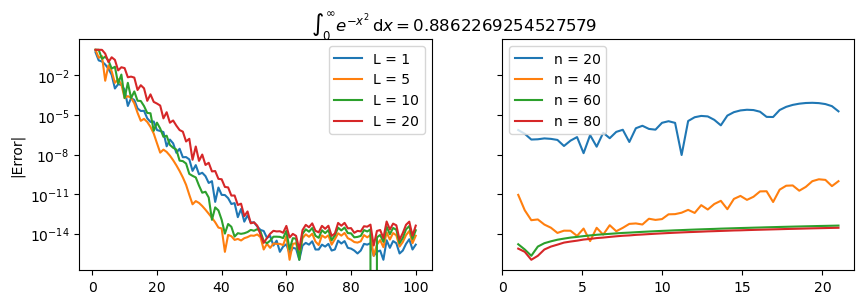

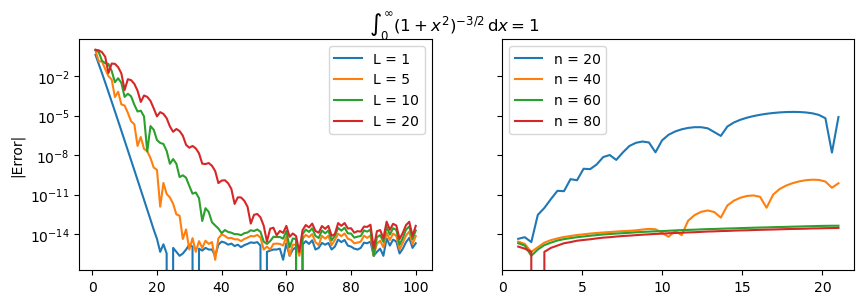

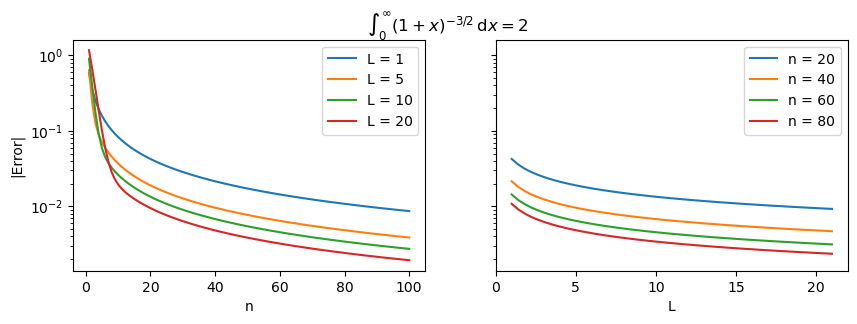

In [5]:
ns = np.arange(1,101)
Ls = np.linspace(1,21,num=50)

# Loop for each integral
for i in range(3):
    fig, (ax1,ax2) = plt.subplots(1,2,sharey='row',figsize=(10,3))
    
    # Fix L
    for L in [1,5,10,20]:
        Error = np.zeros(100)
        # Vary n from 1 to 100
        for j in range(100):
            Error[j] = np.abs(integralinf(F[i],ns[j],L=L)-E[i])
        
        ax1.semilogy(ns,Error,label='L = '+str(L))
        ax1.set_ylabel('|Error|')
    
    # Fix n
    for n in [20,40,60,80]:
        Error = np.zeros(50)  
        # Vary L from 1 to 20
        for j in range(50):
            Error[j] = np.abs(integralinf(F[i],n,L=Ls[j])-E[i])
        ax2.semilogy(Ls,Error,label='n = '+str(n))
    
    ax1.legend()
    ax2.legend()
    if i==2:
        ax1.set_xlabel('n')
        ax2.set_xlabel('L')
    fig.suptitle('$\int_0^\infty '+Fs[i]+'\,\mathrm{d}x = $'+str(E[i]),fontsize=12)

# A specialized quadrature rule <a id='prob4'></a>

To estimate the integral
$$
\int_{-1}^1 \frac{\cos x}{\sqrt{1-x^2}}\,\mathrm{d}x = \pi \mathrm{J}_0(1)
$$
we employ the Gauss-Legendre, midpoint and the specialized quadrature rule as follows:

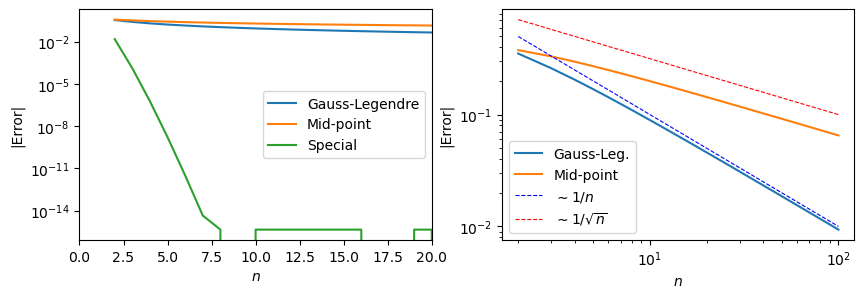

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

# Exact solution
Exact = np.pi*scipy.special.j0(1)
N = np.arange(2,101)

# The integrand
F = lambda x: np.cos(x)/np.sqrt(1-x**2)

# Error array
E = np.zeros([len(N),3])

for n in N:
    # Legendre-Gauss quadrature
    x,w = np.polynomial.legendre.leggauss(n)
    E[n-2,0] = np.abs(np.sum(w*F(x))-Exact)

    # mid-point rule
    xo = np.linspace(-1,1,n+1)
    x = 0.5*(xo[:-1]+xo[1:])
    E[n-2,1] = np.abs(np.sum(np.diff(xo)*F(x))-Exact)

    # Specialized quadrature
    x = np.cos((2*np.arange(n)+1)*np.pi/2/n)
    E[n-2,2] = np.abs(np.pi*np.sum(np.cos(x))/n-Exact)

# PRODUCE PLOTS
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.semilogy(N,E)
ax1.legend(['Gauss-Legendre','Mid-point','Special'])
ax1.set_xlabel('$n$')
ax1.set_ylabel('|Error|')
ax1.set_xlim([0,20])

ax2.loglog(N,E[:,:2])
ax2.set_xlabel('$n$')
ax2.set_ylabel('|Error|')
ax2.plot(N,1/N,'b--',linewidth=0.8)
ax2.plot(N,1/np.sqrt(N),'r--',linewidth=0.8)
ax2.legend(['Gauss-Leg.','Mid-point','$\sim 1/n$','$\sim 1/\sqrt{n}$'])

# Trapezium rule vs FFT <a id='prob5'></a>
To compute the convolution
$$
h(x) = \int_0^{2\pi} \sin(x-s)\mathrm{e}^{\sin s}\,\mathrm{d}s
$$
first, we let, $f(x)=\sin(x)$ and $g(x)=\mathrm{e}^{\sin(x)}$.

In [10]:
# Define mesh
n = 16
x = 2*np.pi*np.arange(n)/n

# Define functions
f = lambda x: np.exp(np.sin(x))
g = lambda x: np.sin(x)

(i) Integral:

In [11]:
I = 2*np.pi*np.sum(f(x[:,np.newaxis]-x)*g(x),axis=1)/n

(ii) We consider the FFT of $h$ 
$$
\hat{h} = \frac{2\pi}{n} \hat{f}\hat{g}
$$
Although we can compute the FFT of $f(x)$, it is an elementary function whose FFT is known, i.e.
```python
f_hat = np.zeros(n)
f_hat[1] = -0.5j*n
f_hat[-1]= 0.5j*n
```
Hence the FFT of the convolution is found from `h_hat` can be equivalently computed by `h_hat = 2*np.pi*np.fft.fft(f(x))*np.fft.fft(g(x))/n`

In [12]:
h_hat = 2*np.pi*np.fft.fft(f(x))#*np.fft.fft(g(x))/n
h_hat[1] *=-0.5j
h_hat[-1]*= 0.5j
h_hat[0] = 0
h_hat[2:-1] = 0

Invert the FFT and verify that the results agree, as expected

[]

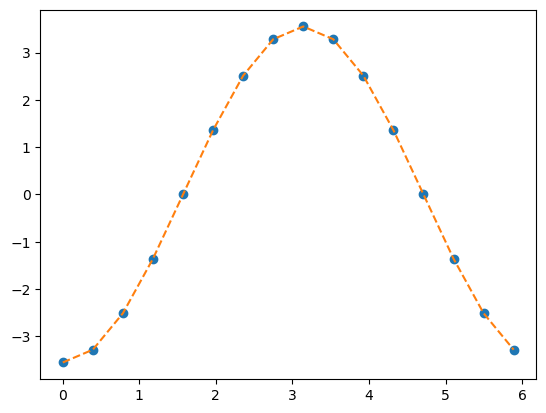

In [23]:
plt.plot(x,np.fft.ifft(h_hat).real,'o',x,I,'--')
plt.plot()

### Task2: Fit the epidemiological data to the model

The code that follows, fits the data
$$
y = \mathrm{e}^{-t/4}\left(\sin(t) +\{noise\}\right)
$$
to the differential equation
$$
y''+a y' + by=0
$$
subject to the appropriate initial conditions $y(0)=y_0$ and $y'(0)=u_0$. The ODE is written as a system as follows
$$
\begin{pmatrix}
y\\
y'\end{pmatrix}' = \begin{pmatrix}
0 & 1\\
-b& - a
\end{pmatrix}\begin{pmatrix}
y\\
y'\end{pmatrix}
$$
'Experimental' data and plot